# Artificial Neural Network for 1D and 2D Regression

In [1]:
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

## Create MLP class

In [2]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases for the hidden layer and output layer
        self.weights_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
    
    def activation(self, x):
        #return 1 / (1 + np.exp(-x))  # sigmoid
        return np.maximum(0, x)      # relu

    def activation_derivative(self, x):
        #return x * (1 - x)           # sigmoid
        return np.where(x > 0, 1, 0)  # relu

    def forward(self, inputs):
        # Forward propagation
        self.hidden_input = np.dot(inputs, self.weights_hidden) + self.bias_hidden
        self.hidden_output = self.activation(self.hidden_input)
        self.output_layer_input = np.dot(self.hidden_output, self.weights_output) + self.bias_output
        self.output = self.output_layer_input
        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backpropagation and Stochastic Gradient Descent
        batch_mse = 0
        
        for i in range(len(inputs)):
            # Single data point forward and backward pass
            input_data = np.array([inputs[i,:]])
            target_data = targets[i]

            # Forward pass
            self.forward(input_data)

            # Backward pass
            output_error = -2 * (target_data - self.output)
            hidden_error = output_error.dot(self.weights_output.T) * self.activation_derivative(self.hidden_output)
            
            # Update weights and biases using Stochastic Gradient Descent
            self.weights_output -= learning_rate * self.hidden_output.T.dot(output_error)
            self.bias_output -= learning_rate * np.sum(output_error, axis=0, keepdims=True)
            self.weights_hidden -= learning_rate * input_data.T.dot(hidden_error)
            self.bias_hidden -= learning_rate * np.sum(hidden_error, axis=0, keepdims=True)
            
            # Add to the batch loss function
            batch_mse += (target_data - self.output) ** 2
            
        return batch_mse / len(inputs)

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            # Forward and backward pass for each data point
            batch_mse = self.backward(inputs, targets, learning_rate)

            # Print the mean squared error for every 1000 epochs
            if (epoch+1) % 1000 == 0 or epoch == 0:
                print(f'Epoch {epoch+1}, Mean Squared Error: {batch_mse}')

    def predict(self, inputs):
        # Make predictions using the trained model
        return self.forward(inputs)

## Toy Example: 1D Regression
Generate a 1D Toy Data Set

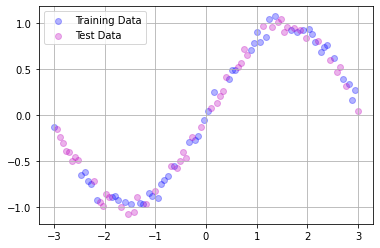

In [3]:
np.random.seed(0)
N = 100
x = np.linspace(-3,3,N).reshape(-1,1)
#y = 0.5*x ** 2 - 2 + 0.5 * (np.random.rand(N,1) - 0.5)
y = np.sin(x) + 0.2 * (np.random.rand(N,1) - 0.5)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

def plot1Ddata(X_train,X_test,y_train,y_test):
    plt.scatter(X_train,y_train,color='b',alpha=0.3,label='Training Data')
    plt.scatter(X_test,y_test,color='m',alpha=0.3,label='Test Data')
    plt.grid()
    
plot1Ddata(X_train, X_test, y_train, y_test)
plt.legend()
plt.show()

Instantiate an MLP then train it

In [4]:
# Define your input, target, and parameters
input_size = 1
hidden_size = 15
output_size = 1
learning_rate = 0.01
epochs = 10000

# Create an instance of MLP
mlp1D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp1D.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Mean Squared Error: [[19.77749495]]
Epoch 1000, Mean Squared Error: [[0.00650419]]
Epoch 2000, Mean Squared Error: [[0.00623278]]
Epoch 3000, Mean Squared Error: [[0.00281866]]
Epoch 4000, Mean Squared Error: [[0.00244378]]
Epoch 5000, Mean Squared Error: [[0.0024131]]
Epoch 6000, Mean Squared Error: [[0.00240844]]
Epoch 7000, Mean Squared Error: [[0.00238818]]
Epoch 8000, Mean Squared Error: [[0.00240044]]
Epoch 9000, Mean Squared Error: [[0.00239692]]


Investigate the trained MLP

In [5]:
print('Output Weights:')
print(mlp1D.weights_output)
print('Hidden Weights:')
print(mlp1D.weights_hidden)
print('Output Biases:')
print(mlp1D.bias_output)
print('Hidden Biases:')
print(mlp1D.bias_hidden)
print('Hidden Output')
print(mlp1D.hidden_output)

train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
for i in range(len(X_train)):
    train_rmse += (y_train[i] - mlp1D.predict(X_train[i])) ** 2
    train_tss += (y_train[i] - y_train_mean) ** 2
for i in range(len(X_test)):
    test_rmse += (y_test[i] - mlp1D.predict(X_test[i])) ** 2
    test_tss += (y_test[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Output Weights:
[[ 0.59010361]
 [-0.29034408]
 [ 1.13966298]
 [-0.78427333]
 [-0.46885218]
 [-0.23300239]
 [-0.56842954]
 [-0.9988426 ]
 [ 0.33216966]
 [-0.50741343]
 [ 0.63331465]
 [-0.42638986]
 [ 0.08921428]
 [ 1.46800575]
 [ 0.53511192]]
Hidden Weights:
[[-0.73490882  0.14070802 -0.74753306 -0.92458447  0.09795986 -0.06878224
   0.56694145 -0.68692479 -0.48684323  0.50348163 -0.81384228  0.54348527
   0.23900856  0.08089758 -0.72472313]]
Output Biases:
[[1.01226604]]
Hidden Biases:
[[-0.0836857  -0.43264739 -1.61826415  0.14051856 -0.65251811 -0.50276204
  -1.19678883  0.90449138 -0.0628636  -1.06225508 -0.80604858 -0.74203596
  -0.10914094 -0.35613817 -0.98577694]]
Hidden Output
[[0.1605618  0.         0.         0.44967399 0.         0.
  0.         1.13469048 0.09901102 0.         0.         0.
  0.         0.         0.        ]]
Training RMSE: [[0.04899333]], Training R2: [[0.99547514]]
Test RMSE:     [[0.06356663]], Test R2: [[0.99148836]]


Visualize the MLP prediction curve

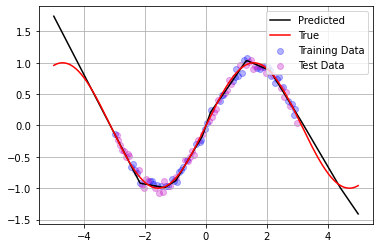

In [6]:
x2 = np.linspace(-5,5,500).reshape(-1,1)
y_pred = np.zeros(x2.shape)
y_true = np.zeros(x2.shape)

for i in range(len(x2)):
    y_pred[i] = mlp1D.predict(x2[i])
    y_true[i] = np.sin(x2[i])

plot1Ddata(X_train, X_test, y_train, y_test)
plt.plot(x2,y_pred,'k',label='Predicted')
plt.plot(x2,y_true,'r',label='True')
plt.legend()
plt.show()

## Toy Example: 2D Regression
Generate a 2D Toy Data Set

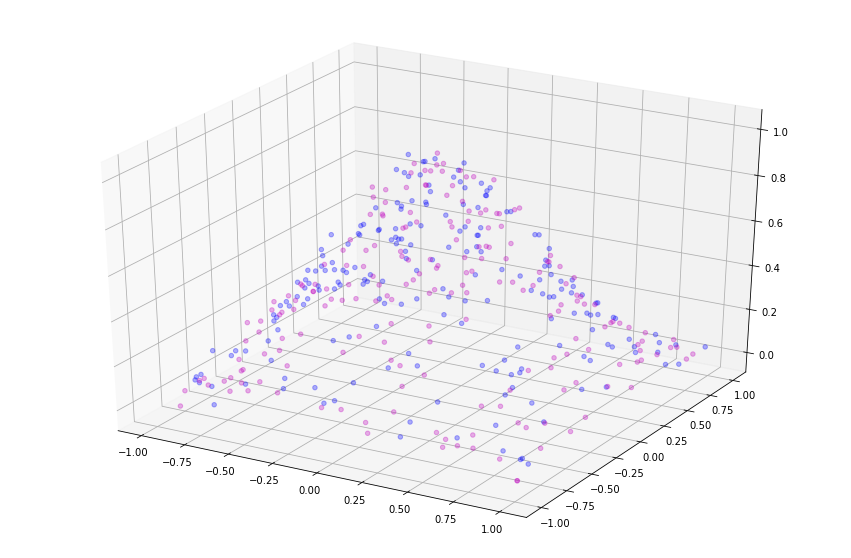

In [7]:
np.random.seed(100)

N = 400
x = 2 * (np.random.rand(N,2) - 0.5)
y = np.exp(-2 * (x[:,0] ** 2 + x[:,1] ** 2)) + 0.1 * (np.random.rand(N) - 0.5)

def plot2Ddata(X_train,X_test,y_train,y_test):
    fig = plt.figure(figsize=(15,10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(X_train[:,0],X_train[:,1],y_train,color='b',alpha=0.3)
    ax.scatter3D(X_test[:,0],X_test[:,1],y_test,color='m',alpha=0.3)
    return fig, ax

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

plot2Ddata(X_train,X_test,y_train,y_test)
plt.show()

In [8]:
# Define your input, target, and parameters
input_size = 2
hidden_size = 20
output_size = 1
learning_rate = 0.001
epochs = 10000

# Create an instance of MLP
mlp2D = MLP(input_size, hidden_size, output_size)

# Train the MLP
mlp2D.train(X_train, y_train, epochs, learning_rate)

Epoch 0, Mean Squared Error: [[2.09745633]]
Epoch 1000, Mean Squared Error: [[0.00259305]]
Epoch 2000, Mean Squared Error: [[0.00240881]]
Epoch 3000, Mean Squared Error: [[0.00232814]]
Epoch 4000, Mean Squared Error: [[0.00224927]]
Epoch 5000, Mean Squared Error: [[0.00218715]]
Epoch 6000, Mean Squared Error: [[0.00213693]]
Epoch 7000, Mean Squared Error: [[0.0020092]]
Epoch 8000, Mean Squared Error: [[0.00190985]]
Epoch 9000, Mean Squared Error: [[0.0018247]]


Investigate the trained MLP

In [9]:
train_rmse = 0
test_rmse = 0
train_tss = 0
test_tss = 0
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)
for i in range(len(X_train)):
    train_rmse += (y_train[i] - mlp2D.predict(X_train[i,:])) ** 2
    train_tss += (y_train[i] - y_train_mean) ** 2
for i in range(len(X_test)):
    test_rmse += (y_test[i] - mlp2D.predict(X_test[i,:])) ** 2
    test_tss += (y_test[i] - y_test_mean) ** 2

train_R2 = 1 - train_rmse / train_tss
test_R2 = 1 - test_rmse / test_tss
train_rmse = np.sqrt(train_rmse / len(X_train))
test_rmse = np.sqrt(test_rmse / len(X_test))
print(f'Training RMSE: {train_rmse}, Training R2: {train_R2}')
print(f'Test RMSE:     {test_rmse}, Test R2: {test_R2}')

Training RMSE: [[0.0408736]], Training R2: [[0.97572228]]
Test RMSE:     [[0.048796]], Test R2: [[0.96862978]]


Visualize the MLP prediction surface

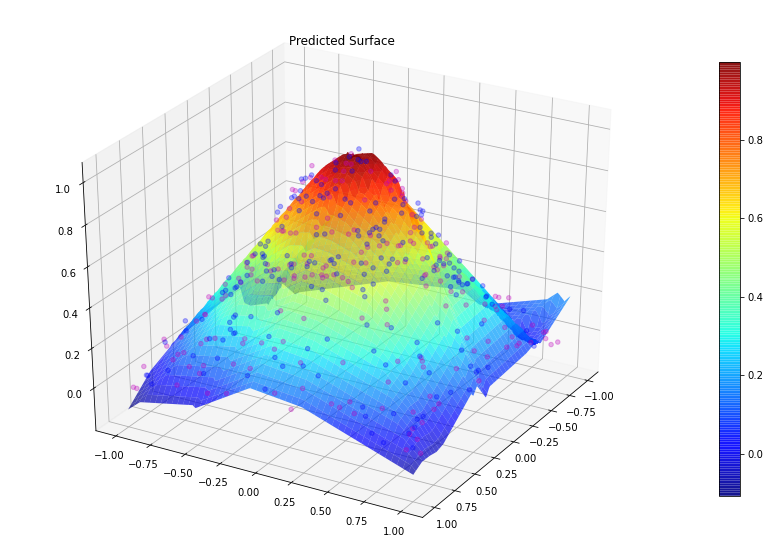

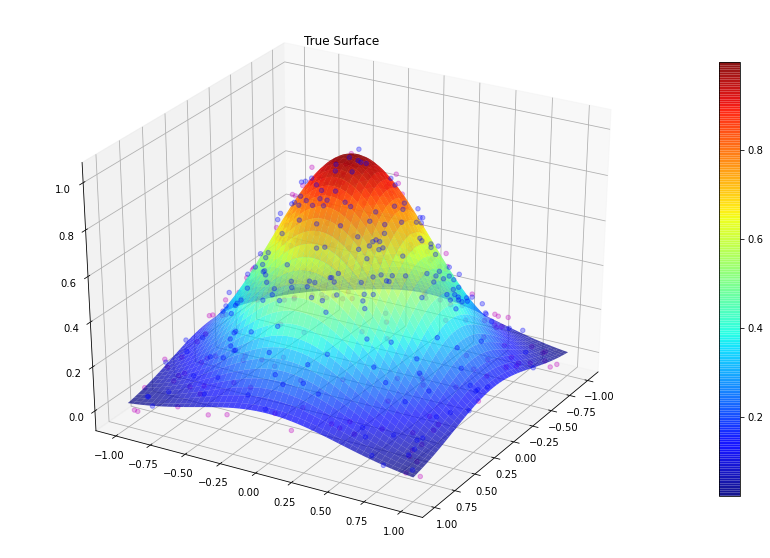

In [10]:
x1, x2 = np.meshgrid(np.linspace(-1,1,200),np.linspace(-1,1,200))
y_pred = np.zeros(x2.shape)
y_true = np.zeros(x2.shape)

for i in range(len(x2)):
    for j in range(len(x2)):
        y_pred[i,j] = mlp2D.predict(np.array((x1[i,j],x2[i,j]))) 
        y_true[i,j] = np.exp(-2 * (x1[i,j] ** 2 + x2[i,j] ** 2))

# Plot the predicted surface
fig, ax = plot2Ddata(X_train, X_test, y_train, y_test)
surf = ax.plot_surface(x1, x2, y_pred,
                       linewidth = 0,
                       cmap=cm.jet,
                       alpha = 0.7)
fig.colorbar(surf, shrink=0.8)
ax.view_init(elev=30, azim=30)
plt.title('Predicted Surface')
plt.show()

# Plot the true surface
fig, ax = plot2Ddata(X_train, X_test, y_train, y_test)
surf = ax.plot_surface(x1, x2, y_true,
                       linewidth = 0,
                       cmap=cm.jet,
                       alpha = 0.7)
fig.colorbar(surf, shrink=0.8)
ax.view_init(elev=30, azim=30)
plt.title('True Surface')
plt.show()